In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Using Neural Network

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import StandardScaler
df_features = df[['sepal_length','sepal_width','petal_length','petal_width']]
scaler = StandardScaler()
df_features = scaler.fit_transform(X=df_features)

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df_targets = df.species.to_numpy().reshape(-1,1)
df_targets = encoder.fit_transform(df_targets)
df_targets = df_targets.toarray()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_targets, test_size=0.33, random_state=42)

In [26]:
# modeling 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras import backend as K

In [8]:
dimData = X_train.shape[1]
nClasses = y_train.shape[1]
advanced_act = LeakyReLU(alpha=.003)
model_reg = Sequential()
model_reg.add(Dense(10, activation= advanced_act , input_shape=(dimData,)))
model_reg.add(Dense(nClasses, activation='softmax'))


In [9]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[ 0.56430876,  0.5716506 ,  0.52331007,  0.4602182 , -0.04871678,
         -0.06252897,  0.61972296, -0.6032307 , -0.16923115,  0.34048092],
        [ 0.53671074,  0.3781252 ,  0.07266098, -0.274978  ,  0.62324023,
          0.28158897,  0.25318903,  0.629148  ,  0.6381042 , -0.51415837],
        [ 0.4340458 , -0.54374725,  0.25664437,  0.1646316 , -0.5907172 ,
          0.6271014 , -0.13481188,  0.17251933,  0.23249042, -0.60420454],
        [-0.17206684, -0.47498253, -0.29797757,  0.14174253,  0.42662823,
          0.28498733,  0.44898462,  0.05357784,  0.47787142, -0.30589354]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[ 0.6614698 , -0.57910836, -0.5780641 ],
        [ 0.34821427,  0.23849452,  0.38997698],
        [-0.33776 

In [10]:
model_reg.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_reg = model_reg.fit(X_train, y_train, batch_size=256, epochs=500, verbose=2,
                        validation_data=(X_test, y_test))

Epoch 1/500
1/1 - 0s - loss: 1.2108 - accuracy: 0.2300 - val_loss: 1.1430 - val_accuracy: 0.2200
Epoch 2/500
1/1 - 0s - loss: 1.2030 - accuracy: 0.2400 - val_loss: 1.1349 - val_accuracy: 0.2200
Epoch 3/500
1/1 - 0s - loss: 1.1952 - accuracy: 0.2600 - val_loss: 1.1269 - val_accuracy: 0.2200
Epoch 4/500
1/1 - 0s - loss: 1.1876 - accuracy: 0.2600 - val_loss: 1.1190 - val_accuracy: 0.2000
Epoch 5/500
1/1 - 0s - loss: 1.1799 - accuracy: 0.2600 - val_loss: 1.1111 - val_accuracy: 0.2000
Epoch 6/500
1/1 - 0s - loss: 1.1723 - accuracy: 0.2600 - val_loss: 1.1033 - val_accuracy: 0.2400
Epoch 7/500
1/1 - 0s - loss: 1.1648 - accuracy: 0.2600 - val_loss: 1.0955 - val_accuracy: 0.2600
Epoch 8/500
1/1 - 0s - loss: 1.1574 - accuracy: 0.2700 - val_loss: 1.0879 - val_accuracy: 0.2600
Epoch 9/500
1/1 - 0s - loss: 1.1500 - accuracy: 0.2700 - val_loss: 1.0803 - val_accuracy: 0.2800
Epoch 10/500
1/1 - 0s - loss: 1.1427 - accuracy: 0.2700 - val_loss: 1.0728 - val_accuracy: 0.2800
Epoch 11/500
1/1 - 0s - loss:

Epoch 85/500
1/1 - 0s - loss: 0.7482 - accuracy: 0.7300 - val_loss: 0.6735 - val_accuracy: 0.7400
Epoch 86/500
1/1 - 0s - loss: 0.7446 - accuracy: 0.7300 - val_loss: 0.6700 - val_accuracy: 0.7400
Epoch 87/500
1/1 - 0s - loss: 0.7411 - accuracy: 0.7300 - val_loss: 0.6666 - val_accuracy: 0.7400
Epoch 88/500
1/1 - 0s - loss: 0.7376 - accuracy: 0.7300 - val_loss: 0.6633 - val_accuracy: 0.7400
Epoch 89/500
1/1 - 0s - loss: 0.7341 - accuracy: 0.7300 - val_loss: 0.6599 - val_accuracy: 0.7400
Epoch 90/500
1/1 - 0s - loss: 0.7307 - accuracy: 0.7300 - val_loss: 0.6566 - val_accuracy: 0.7600
Epoch 91/500
1/1 - 0s - loss: 0.7273 - accuracy: 0.7300 - val_loss: 0.6533 - val_accuracy: 0.7600
Epoch 92/500
1/1 - 0s - loss: 0.7239 - accuracy: 0.7400 - val_loss: 0.6501 - val_accuracy: 0.7600
Epoch 93/500
1/1 - 0s - loss: 0.7206 - accuracy: 0.7500 - val_loss: 0.6469 - val_accuracy: 0.7600
Epoch 94/500
1/1 - 0s - loss: 0.7173 - accuracy: 0.7500 - val_loss: 0.6437 - val_accuracy: 0.7600
Epoch 95/500
1/1 - 0

Epoch 168/500
1/1 - 0s - loss: 0.5460 - accuracy: 0.8100 - val_loss: 0.4922 - val_accuracy: 0.8400
Epoch 169/500
1/1 - 0s - loss: 0.5444 - accuracy: 0.8100 - val_loss: 0.4909 - val_accuracy: 0.8400
Epoch 170/500
1/1 - 0s - loss: 0.5428 - accuracy: 0.8100 - val_loss: 0.4896 - val_accuracy: 0.8400
Epoch 171/500
1/1 - 0s - loss: 0.5412 - accuracy: 0.8100 - val_loss: 0.4883 - val_accuracy: 0.8400
Epoch 172/500
1/1 - 0s - loss: 0.5397 - accuracy: 0.8100 - val_loss: 0.4870 - val_accuracy: 0.8400
Epoch 173/500
1/1 - 0s - loss: 0.5381 - accuracy: 0.8100 - val_loss: 0.4857 - val_accuracy: 0.8400
Epoch 174/500
1/1 - 0s - loss: 0.5366 - accuracy: 0.8100 - val_loss: 0.4845 - val_accuracy: 0.8400
Epoch 175/500
1/1 - 0s - loss: 0.5351 - accuracy: 0.8100 - val_loss: 0.4832 - val_accuracy: 0.8400
Epoch 176/500
1/1 - 0s - loss: 0.5336 - accuracy: 0.8100 - val_loss: 0.4820 - val_accuracy: 0.8400
Epoch 177/500
1/1 - 0s - loss: 0.5321 - accuracy: 0.8100 - val_loss: 0.4808 - val_accuracy: 0.8400
Epoch 178/

Epoch 251/500
1/1 - 0s - loss: 0.4479 - accuracy: 0.8600 - val_loss: 0.4134 - val_accuracy: 0.8400
Epoch 252/500
1/1 - 0s - loss: 0.4470 - accuracy: 0.8600 - val_loss: 0.4128 - val_accuracy: 0.8400
Epoch 253/500
1/1 - 0s - loss: 0.4461 - accuracy: 0.8600 - val_loss: 0.4121 - val_accuracy: 0.8400
Epoch 254/500
1/1 - 0s - loss: 0.4453 - accuracy: 0.8600 - val_loss: 0.4114 - val_accuracy: 0.8400
Epoch 255/500
1/1 - 0s - loss: 0.4444 - accuracy: 0.8600 - val_loss: 0.4107 - val_accuracy: 0.8400
Epoch 256/500
1/1 - 0s - loss: 0.4435 - accuracy: 0.8600 - val_loss: 0.4101 - val_accuracy: 0.8400
Epoch 257/500
1/1 - 0s - loss: 0.4427 - accuracy: 0.8600 - val_loss: 0.4094 - val_accuracy: 0.8400
Epoch 258/500
1/1 - 0s - loss: 0.4418 - accuracy: 0.8600 - val_loss: 0.4087 - val_accuracy: 0.8400
Epoch 259/500
1/1 - 0s - loss: 0.4410 - accuracy: 0.8600 - val_loss: 0.4081 - val_accuracy: 0.8400
Epoch 260/500
1/1 - 0s - loss: 0.4401 - accuracy: 0.8600 - val_loss: 0.4074 - val_accuracy: 0.8400
Epoch 261/

Epoch 334/500
1/1 - 0s - loss: 0.3878 - accuracy: 0.8700 - val_loss: 0.3672 - val_accuracy: 0.8400
Epoch 335/500
1/1 - 0s - loss: 0.3872 - accuracy: 0.8700 - val_loss: 0.3668 - val_accuracy: 0.8400
Epoch 336/500
1/1 - 0s - loss: 0.3867 - accuracy: 0.8700 - val_loss: 0.3663 - val_accuracy: 0.8400
Epoch 337/500
1/1 - 0s - loss: 0.3861 - accuracy: 0.8700 - val_loss: 0.3659 - val_accuracy: 0.8400
Epoch 338/500
1/1 - 0s - loss: 0.3855 - accuracy: 0.8700 - val_loss: 0.3655 - val_accuracy: 0.8400
Epoch 339/500
1/1 - 0s - loss: 0.3850 - accuracy: 0.8700 - val_loss: 0.3650 - val_accuracy: 0.8400
Epoch 340/500
1/1 - 0s - loss: 0.3844 - accuracy: 0.8700 - val_loss: 0.3646 - val_accuracy: 0.8400
Epoch 341/500
1/1 - 0s - loss: 0.3839 - accuracy: 0.8700 - val_loss: 0.3642 - val_accuracy: 0.8400
Epoch 342/500
1/1 - 0s - loss: 0.3833 - accuracy: 0.8700 - val_loss: 0.3638 - val_accuracy: 0.8400
Epoch 343/500
1/1 - 0s - loss: 0.3827 - accuracy: 0.8700 - val_loss: 0.3633 - val_accuracy: 0.8400
Epoch 344/

Epoch 417/500
1/1 - 0s - loss: 0.3488 - accuracy: 0.8800 - val_loss: 0.3367 - val_accuracy: 0.8400
Epoch 418/500
1/1 - 0s - loss: 0.3484 - accuracy: 0.8800 - val_loss: 0.3364 - val_accuracy: 0.8400
Epoch 419/500
1/1 - 0s - loss: 0.3480 - accuracy: 0.8800 - val_loss: 0.3360 - val_accuracy: 0.8400
Epoch 420/500
1/1 - 0s - loss: 0.3476 - accuracy: 0.8800 - val_loss: 0.3357 - val_accuracy: 0.8400
Epoch 421/500
1/1 - 0s - loss: 0.3472 - accuracy: 0.8800 - val_loss: 0.3354 - val_accuracy: 0.8400
Epoch 422/500
1/1 - 0s - loss: 0.3468 - accuracy: 0.8800 - val_loss: 0.3351 - val_accuracy: 0.8400
Epoch 423/500
1/1 - 0s - loss: 0.3464 - accuracy: 0.8800 - val_loss: 0.3348 - val_accuracy: 0.8400
Epoch 424/500
1/1 - 0s - loss: 0.3461 - accuracy: 0.8800 - val_loss: 0.3345 - val_accuracy: 0.8400
Epoch 425/500
1/1 - 0s - loss: 0.3457 - accuracy: 0.8800 - val_loss: 0.3342 - val_accuracy: 0.8400
Epoch 426/500
1/1 - 0s - loss: 0.3453 - accuracy: 0.8800 - val_loss: 0.3339 - val_accuracy: 0.8400
Epoch 427/

Epoch 500/500
1/1 - 0s - loss: 0.3189 - accuracy: 0.9000 - val_loss: 0.3125 - val_accuracy: 0.8600


Text(0.5, 1.0, 'Loss Curves')

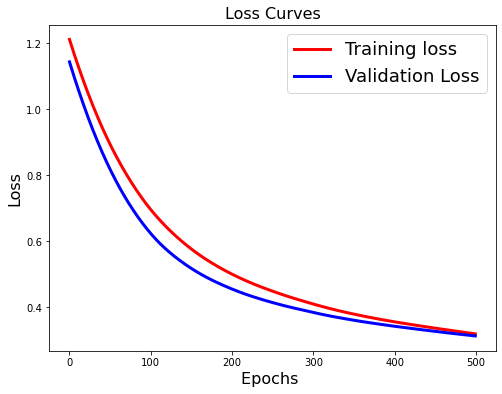

In [11]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(mlp_reg.history['loss'],'r',linewidth=3.0)
plt.plot(mlp_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

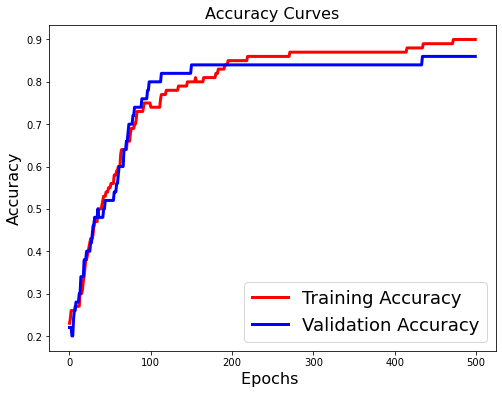

In [12]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(mlp_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(mlp_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Using Genetic Algorithm

In [13]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[ 0.43176958,  0.12864476,  0.57635385,  0.08888849, -0.34096113,
         -0.27754787,  0.7507571 , -0.44668153, -0.34924302,  0.25352073],
        [ 0.74141216,  0.6108418 , -0.38558182, -0.64622635,  0.795032  ,
          0.30936214,  0.04951568,  0.43622148,  0.78044486, -0.23473929],
        [ 0.3177704 , -0.9679988 ,  0.62455595,  0.46333408, -0.89020914,
          0.40657714,  0.1547705 ,  0.36438084,  0.04302108, -0.8346867 ],
        [-0.27272433, -0.89315516,  0.08061167,  0.4337391 ,  0.12082352,
          0.05400112,  0.78011376,  0.26717457,  0.27953   , -0.53930837]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.13145481,  0.36572486,  0.42005786,  0.35806748,  0.20181367,
        -0.22815016,  0.15196931,  0.01187899, -0.12811714, -0.254012  ],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[

In [14]:
# creating  population with random weights
population_size = 50
# W1 size(4,10)  ip-hidden
# W2 size (10,)  act hidden
# W3 size (10,3) hidden-output
# W4 size (3) output act

# generate this for 50 population
W1_shape = K.eval(model_reg.weights[0]).shape
W2_shape = K.eval(model_reg.weights[1]).shape
W3_shape = K.eval(model_reg.weights[2]).shape
W4_shape = K.eval(model_reg.weights[3]).shape

W1 =np.random.randn(W1_shape[0],W1_shape[1])
W2 =np.random.randn(W2_shape[0])
W3 =np.random.randn(W3_shape[0],W3_shape[1])
W4 =np.random.randn(W4_shape[0])


In [15]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[ 0.43176958,  0.12864476,  0.57635385,  0.08888849, -0.34096113,
         -0.27754787,  0.7507571 , -0.44668153, -0.34924302,  0.25352073],
        [ 0.74141216,  0.6108418 , -0.38558182, -0.64622635,  0.795032  ,
          0.30936214,  0.04951568,  0.43622148,  0.78044486, -0.23473929],
        [ 0.3177704 , -0.9679988 ,  0.62455595,  0.46333408, -0.89020914,
          0.40657714,  0.1547705 ,  0.36438084,  0.04302108, -0.8346867 ],
        [-0.27272433, -0.89315516,  0.08061167,  0.4337391 ,  0.12082352,
          0.05400112,  0.78011376,  0.26717457,  0.27953   , -0.53930837]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.13145481,  0.36572486,  0.42005786,  0.35806748,  0.20181367,
        -0.22815016,  0.15196931,  0.01187899, -0.12811714, -0.254012  ],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[

In [16]:
print(W1)
print(W2)
print(W3)
print(W4)

[[ 1.03293736  1.02681306 -0.30361866 -0.35372667 -0.58855878  0.10784059
   0.27131266  2.41833384  0.88178579  1.40230233]
 [-0.44605095 -0.27636801  0.90381601 -0.58630494 -0.35238071  0.52702925
   0.78106775  0.65000213  0.69557297 -1.39123329]
 [-0.2674882   0.02159122 -0.1813807  -0.34773254 -0.58643683 -1.28264311
   0.24921217 -0.33112461  0.65885799 -0.41372603]
 [-1.09797616 -0.05017746  2.56134313 -1.14904921  0.5904254  -0.38758419
  -0.7432144   0.09107925  0.85659517  0.0848542 ]]
[-1.48587584 -0.68633736  0.76529799  0.6741854   1.20309735 -0.15079808
 -0.53041941 -0.59482191 -1.15465018 -0.40853344]
[[-0.339355    0.22070365  0.69329418]
 [-0.96471594  0.84925861  0.66766958]
 [ 1.14237626 -0.08994247 -0.11089539]
 [ 0.36207924  0.1327912  -0.27196156]
 [ 1.1629549   0.00720833 -0.25824805]
 [ 0.50474903 -1.08910529 -2.14427102]
 [-1.12692816 -0.51827905 -0.50921259]
 [-0.75761774  0.35437344  1.31873189]
 [ 1.31549674 -1.04777088 -0.5189443 ]
 [-0.92064843 -0.31798743

In [17]:
class Gene:
    def __init__(self,W1_shape,W2_shape,W3_shape,W4_shape):
        self.W1 =np.random.randn(W1_shape[0],W1_shape[1])
        self.W2 =np.random.randn(W2_shape[0])
        self.W3 =np.random.randn(W3_shape[0],W3_shape[1])
        self.W4 =np.random.randn(W4_shape[0])
        
    def show_gene(self):
        print(self.W1)
        print(self.W2)
        print(self.W3)
        print(self.W4)
        

In [40]:
class genetic_algo:
    def __init__(self,pop_size):
        self.popualtion_size = pop_size
        self.gene = []
        self.fitness_score = []
        
    # generate population
    def generate_population(self,W1_shape,W2_shape,W3_shape,W4_shape):
        for i in range(self.popualtion_size):
            self.gene.append(Gene(W1_shape,W2_shape,W3_shape,W4_shape))
    
    # set weight
    def set_model_weights(self,model1,W1,W2,W3,W4):
        model1.layers[0].set_weights([W1,W2])
        model1.layers[1].set_weights([W3,W4])
        return model1
        
    #Foward propagate function
    def forward_propagate(self,model,X_train,y_train):
        
        for pop in range(self.popualtion_size):
            model = self.set_model_weights(model,self.gene[pop].W1,self.gene[pop].W2,self.gene[pop].W3,self.gene[pop].W4)
            step=0
            total_loss = 0
            loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
            for x_batch_train, y_batch_train in zip(X_train,y_train):
                logits = model(x_batch_train.reshape(1,-1))
                y_true = y_batch_train
                count=0
                for i in range(len(y_true)):
                    if y_true[i]==1:
                        break
                    count+=1
                loss_value = loss_fn(count, logits)
                total_loss+=loss_value
                #print("Training loss at step %d: %.4f" % (step, float(loss_value)))
                step+=1
            avg_loss = total_loss/len(X_train)
            print(" Gene %d: Average trainning loss is %f"%(pop,avg_loss))
            self.fitness_score.append(float(avg_loss))
        return self.fitness_score
    #Natural_Selection
    
    
    #Reproduction
    
    
    #Mutuation

In [44]:
Population = genetic_algo(50)

In [45]:
Population.generate_population(W1_shape,W2_shape,W3_shape,W4_shape)

In [47]:
fitness = Population.forward_propagate(model_reg,X_train,y_train)

 Gene 0: Average trainning loss is 1.381474
 Gene 1: Average trainning loss is 1.082393
 Gene 2: Average trainning loss is 1.345194
 Gene 3: Average trainning loss is 1.399145
 Gene 4: Average trainning loss is 0.899263
 Gene 5: Average trainning loss is 1.394779
 Gene 6: Average trainning loss is 1.302411
 Gene 7: Average trainning loss is 1.201842
 Gene 8: Average trainning loss is 1.063625
 Gene 9: Average trainning loss is 1.493523
 Gene 10: Average trainning loss is 1.226978
 Gene 11: Average trainning loss is 1.052462
 Gene 12: Average trainning loss is 0.973005
 Gene 13: Average trainning loss is 1.330306
 Gene 14: Average trainning loss is 1.301794
 Gene 15: Average trainning loss is 1.385906
 Gene 16: Average trainning loss is 1.126417
 Gene 17: Average trainning loss is 1.057646
 Gene 18: Average trainning loss is 1.341873
 Gene 19: Average trainning loss is 1.154817
 Gene 20: Average trainning loss is 1.416049
 Gene 21: Average trainning loss is 1.163203
 Gene 22: Average tr

In [48]:
fitness = sorted(fitness)

In [49]:
fitness

[0.8992626070976257,
 0.8992626070976257,
 0.9110777974128723,
 0.9110777974128723,
 0.9356913566589355,
 0.9356913566589355,
 0.9730053544044495,
 0.9730053544044495,
 0.9919347167015076,
 0.9919347167015076,
 1.015671968460083,
 1.015671968460083,
 1.0327191352844238,
 1.0327191352844238,
 1.0410239696502686,
 1.0410239696502686,
 1.0451031923294067,
 1.0451031923294067,
 1.0524615049362183,
 1.0524615049362183,
 1.0576461553573608,
 1.0576461553573608,
 1.0636253356933594,
 1.0636253356933594,
 1.082130789756775,
 1.082130789756775,
 1.082392930984497,
 1.082392930984497,
 1.0940632820129395,
 1.0940632820129395,
 1.1080833673477173,
 1.1080833673477173,
 1.126416802406311,
 1.126416802406311,
 1.1309466361999512,
 1.1309466361999512,
 1.1314938068389893,
 1.1314938068389893,
 1.1363896131515503,
 1.1363896131515503,
 1.1548168659210205,
 1.1548168659210205,
 1.163203477859497,
 1.163203477859497,
 1.165367603302002,
 1.165367603302002,
 1.201841950416565,
 1.201841950416565,
 1.203